In [ ]:
# notebook yet to be updated 

In [9]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(1, 'c:\\Users\\College\\Documents\\mmlf\\Current Projects\\Project 1\\src')
import tools

ga = pd.read_csv('../src/gs.csv')
ra = pd.read_csv('../src/ra.csv')
# train_df = pd.read_csv(f'{INPUT_DIR}adult.data', header = None, names = COL_NAMES)
# test_df = pd.read_csv(f'{INPUT_DIR}adult.test', header = None, names = COL_NAMES)

['c:\\Users\\College\\Documents\\mmlf\\Current Projects\\Project 1\\notebooks', 'c:\\Users\\College\\Documents\\mmlf\\Current Projects\\Project 1\\src', 'c:\\Users\\College\\.vscode\\extensions\\ms-toolsai.jupyter-2021.2.603412351\\pythonFiles', 'c:\\Users\\College\\.vscode\\extensions\\ms-toolsai.jupyter-2021.2.603412351\\pythonFiles\\lib\\python', 'C:\\Users\\College\\anaconda3\\python38.zip', 'C:\\Users\\College\\anaconda3\\DLLs', 'C:\\Users\\College\\anaconda3\\lib', 'C:\\Users\\College\\anaconda3', '', 'C:\\Users\\College\\AppData\\Roaming\\Python\\Python38\\site-packages', 'C:\\Users\\College\\anaconda3\\lib\\site-packages', 'C:\\Users\\College\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\College\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\College\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\College\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\College\\.ipython']


In [4]:
# train_raw_report = ProfileReport(test_df, explorative = True) 
# train_raw_report.to_file("train_raw_report.html")
# test_raw_report = ProfileReport(test_df, explorative = True) 
# test_raw_report.to_file("test_raw_report.html")

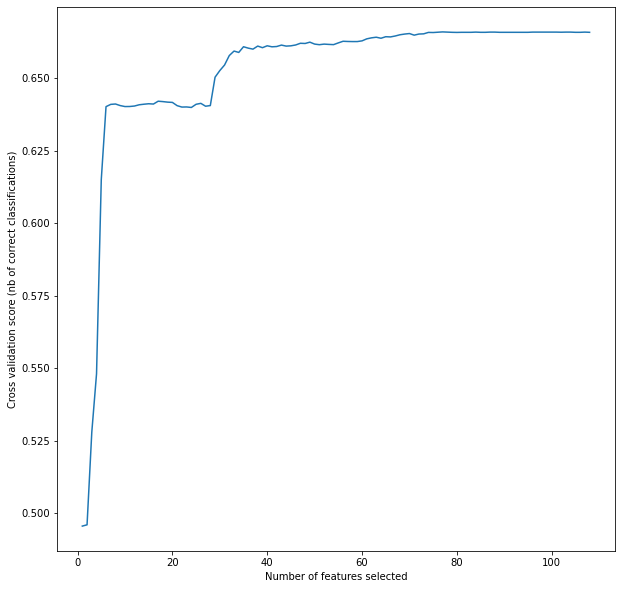

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
min_features_to_select = 1
plt.plot(range(min_features_to_select,
               len(ga['grid_scores']) + min_features_to_select),
         ga['grid_scores'])
plt.show()

In [60]:
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)
fold_no = 0
for train_index, test_index in skf.split(X, y):
    X_samp_train, X_samp_test = X[train_index], X[test_index]
    y_samp_train, y_samp_test = y[train_index], y[test_index]
    
    fold_no += 1
    print(f"Fold : {fold_no}          Model used : Logistic Regression")
    
    lc = LogisticRegression(max_iter = 20000, class_weight = "balanced").fit(X_samp_train,y_samp_train)
    
    print("Precision : {}".format(precision_score(y_samp_test, lc.predict(X_samp_test))))
    print("Recall : {}".format(recall_score(y_samp_test, lc.predict(X_samp_test))))
    print("f1_score : {}".format(f1_score(y_samp_test, lc.predict(X_samp_test))))
    array_ = confusion_matrix(y_samp_test, lc.predict(X_samp_test))
    print(array_)
#     df_cm = pd.DataFrame(array_, index = [i for i in ['1','0']], columns = [i for i in ['1','0']])
#     plt.figure(figsize = (10,7))
    #sn.heatmap(df_cm, annot=True)
    #plt.show()
    print("")
    print("")

Fold : 1          Model used : Logistic Regression
Precision : 0.566301703163017
Recall : 0.8357271095152603
f1_score : 0.6751269035532995
[[2637  713]
 [ 183  931]]


Fold : 2          Model used : Logistic Regression
Precision : 0.558600583090379
Recall : 0.8591928251121076
f1_score : 0.6770318021201414
[[2592  757]
 [ 157  958]]


Fold : 3          Model used : Logistic Regression
Precision : 0.5595947556615017
Recall : 0.842152466367713
f1_score : 0.6723952738990332
[[2610  739]
 [ 176  939]]


Fold : 4          Model used : Logistic Regression
Precision : 0.5631358467983244
Recall : 0.8439461883408071
f1_score : 0.6755204594400575
[[2619  730]
 [ 174  941]]


Fold : 5          Model used : Logistic Regression
Precision : 0.5357554786620531
Recall : 0.8339317773788151
f1_score : 0.6523876404494382
[[2544  805]
 [ 185  929]]


